# 0525-26 여러 모델 시도해보는 건 어려워 보이지는 않음
근데 로딩 시간이..길어요.. 저만 그런 건지 모르겠어요

## 우선 병합된 역별 시간대별 노인 승하차.csv 파일 임의로 진행

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# 데이터 불러오기
data = pd.read_csv('역별 시간대별 노인 승하차.csv', encoding='cp949')

In [3]:
# 특성 선택 및 타겟 변수 분리
X = data[['호선명', '역번호', '역명', '승하차구분', '06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대', 
                '10-11시간대', '11-12시간대','12-13시간대','13-14시간대','14-15시간대',
                '15-16시간대','16-17시간대','17-18시간대','18-19시간대','19-20시간대',
                '20-21시간대','21-22시간대','22-23시간대','23-24시간대','24시간대이후']]
y = data['승하차인원수']

In [4]:
# 범주형 변수 인코딩
X_encoded = pd.get_dummies(X, columns=['호선명', '역번호', '역명', '승하차구분'])

In [5]:
# 학습 데이터, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 1. 다층 퍼셉트론 신경망 모델

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

In [7]:
# 다층 퍼셉트론 회귀 모델 구축
model = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', random_state=42)

In [8]:
# 모델 학습
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 64), random_state=42)

In [9]:
# 모델 예측
y_pred = model.predict(X_test)

In [11]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(mse)

58651510.25755957


- 평균제곱오차 MSE
- MSE는 예측 값과 실제 값 사이의 차이의 제곱을 평균한 값으로, 예측 모델의 성능을 평가하는 지표
- MSE 값이 크다는 것은 예측 모델이 실제 값과 상당히 차이가 나는 예측을 한다는 것을 의미
- 따라서 해당 모델의 예측 성능이 좋지 않다고 할 수 있다

MSE 값은 원래 오차 값의 제곱이기 때문에 실제 승하차인원수와 예측한 승하차인원수의 차이가 매우 크다는 것을 의미한다. 
- 이는 모델이 주어진 특성들을 제대로 학습하지 못하거나, 데이터의 다양성을 충분히 반영하지 못한 것일 수 있다

# 2. XGBOOST 모델

In [13]:
from xgboost import XGBRegressor

In [14]:
# XGBoost 회귀 모델 구축
model = XGBRegressor(random_state=42)

In [15]:
# 모델 학습
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [16]:
# 모델 예측
y_pred = model.predict(X_test)

In [18]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(mse)

102859880.00903508


# 3. SVM(Support Vector Machine) 회귀 모델

In [19]:
from sklearn.svm import SVR

In [20]:
# SVM 회귀 모델 구축
model = SVR(kernel='rbf')

In [21]:
# 모델 학습
model.fit(X_train, y_train)

SVR()

In [22]:
# 모델 예측
y_pred = model.predict(X_test)

In [24]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(mse)

1908821510.4367251


# 4. 랜덤 포레스트 회귀 모델

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
# 랜덤 포레스트 회귀 모델 구축
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [28]:
# 모델 학습
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(mse)

72427721.0847743


- 의사결정트리 시각화

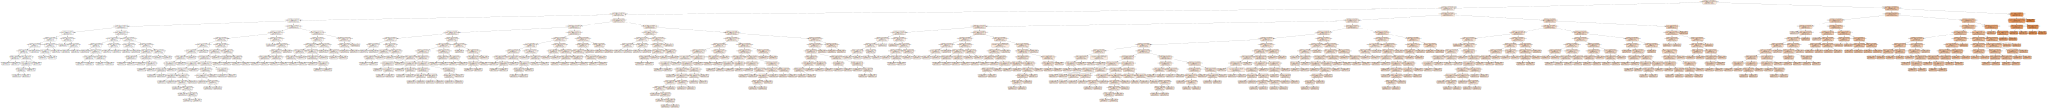

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

# 의사결정 트리 모델 구축
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# 의사결정 트리 시각화
dot_data = export_graphviz(decision_tree_model, out_file=None,
                           feature_names=X_encoded.columns,
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("Decision_tree")

# 의사결정 트리 출력
graph